# Поле равномерно заряженной нити

Рассмотрим нить длиной $2l$ с общим зарядом, равным $q$. Представим ее как набор $N$ одинаковых точечных зарядов $q_i = \frac {q} {N}$. 

Поле одиночного заряда определяется выражением

$$ \vec{E} = \frac{1}{4\pi\varepsilon_0} \frac {q_i} {r^3} \vec{r},$$ 

где $\vec{r}$ – радиус-вектор точки, в которой определяется поле.

Если точечный заряд расположен в точке с координатами $(x_i,y_i)$ в декартовой системе коордтнат, то радиус вектор $\vec{r} = \vec{i} \ast (x -x_i)+\vec{j}*(y -y_i)$ и напряженность поля $\vec(E)(x,y)$ будет записываться в виде 

$$ \vec{E}(x,y) = \frac{1}{4\pi\varepsilon_0} \frac {q_i} {\sqrt{((x -x_i)^2 +(y -y_i)^2)}^3} (\vec{i} \ast (x -x_i)+\vec{j}*(y -y_i)) $$

Тогда суммарная напряженность от $N$ зарядов определяется выражением

$$ \vec{E}(x,y) = \sum_{i=1}^N \vec{E}_i(x,y) = \frac{1}{4\pi\varepsilon_0} \frac {q_i} {\sqrt{((x -x_i)^2 +(y -y_i)^2)}^3} (\vec{i} \ast (x -x_i)+\vec{j}*(y -y_i)) $$

## Вычисляем и рисуем

Начнем, с импорта библиотек, которыми мы будем пользоваться в блокноте: NumPy для работы с массивами, Matplotlib для визуализации и math для различных математических функций.

Еще добавим команду %matplotlib inline для встраивания рисунков в блокнот.

In [1]:
import numpy
import math
from matplotlib import pyplot
# отображение картинок в блокноте
%matplotlib inline

Определим декартову сетку, состоящую из равномерно распределённых по расчетной области точек. В качестве расчетной области выберем прямоугольник со сторонами 8 по оси $x$ и 4 по оси $y$: $x,y\in\left[-4,4\right],\left[-2,2\right]$.

Число точек обозначим переменной `N`, а границы расчетной области — переменными `x_start`, `x_end`, `y_start` и `y_end`.

In [5]:
eps_0 = 8.85e-12
N = 200                     # Число узлов сетки в каждом направлении
x_start, x_end = -4.0, 4.0            # границы по x
y_start, y_end = -2.0, 2.0            # границы по y
x = numpy.linspace(x_start, x_end, N)    # одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # одномерный массив y
X, Y = numpy.meshgrid(x, y)              # создает сетку

In [6]:
def get_field_components(strength, xs, ys, X, Y):
    """
    Returns the electric field generated by a point charge.
    
    Parameters
    ----------
    strength: float
        Strength of the point charge.
    xs: float
        x-coordinate of the point charge.
    ys: float
        y-coordinate of the point charge.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    E_x: 2D Numpy array of floats
        x-component of the vector field.
    E_y: 2D Numpy array of floats
        y-component of the vector field.
    """
    E_x = strength/(4*numpy.pi*eps_0)*(X-xs)/((X-xs)**2+(Y-ys)**2)**(3/2)
    E_y = strength/(4*numpy.pi*eps_0)*(Y-ys)/((X-xs)**2+(Y-ys)**2)**(3/2)
    
    return E_x, E_y

Пусть нить расположена вертикально при $x=0$, а по $y$ – от $-1$ до $1$. Заряд нити $q = 2 \cdot 10^{-12}$, число элементраных зарядов на ней $N_q = 11$

In [55]:
N_charge = 11
x_charge = numpy.zeros(N_charge)
y_charge = numpy.linspace(-1,1,N_charge)
Q = 2e-12

In [56]:
E_x = numpy.zeros_like(X)
E_y = numpy.zeros_like(X)

for x_c,y_c in zip(x_charge,y_charge):
    E_xi,E_yi = get_field_components(Q/N_charge,x_c,y_c, X, Y)
    E_x = E_x +  E_xi
    E_y = E_y +  E_yi

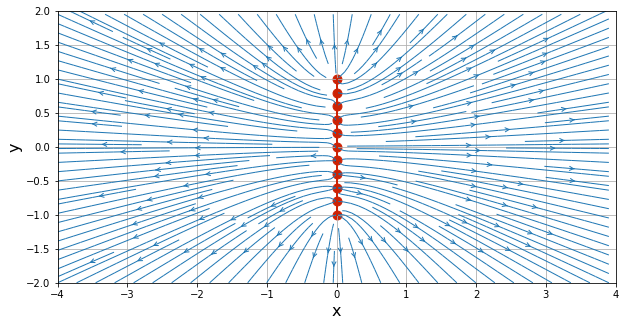

In [57]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, E_x, E_y, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(x_charge, y_charge, color='#CD2305', s=80, marker='o')
pyplot.axvline(0.0, (y_charge.min() - y_start) / (y_end-y_start),
               (y_charge.max() - y_start)/ (y_end-y_start),
color='#CD2305', linewidth=2)
# определяем точку торможения
#x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
#y_stagnation = y_source

# рисуем точку торможения
#pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# рисуем разделительную линию тока
#pyplot.contour(X, Y, psi, 
#            levels=[-strength_source/2, +strength_source/2], 
#            colors='#CD2305', linewidths=2, linestyles='solid');

## Оценка точности

Точное решение на оси $x$:

$$ E(x) = \frac {1}{4\pi\varepsilon_0} \frac{q}{x\sqrt{l^2+x^2 }} $$

Оформим его в виде функции:

In [ ]:
def E_x_theor(strength,length,x):
    return strength/(4*numpy.pi*eps_0)/(x*(length**2 + x**2)**0.5)

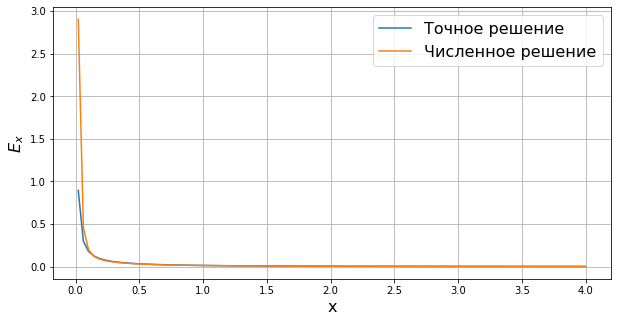

In [65]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel(r'$E_x$', fontsize=16)
pyplot.plot(x[100:], E_x_theor(Q,1,x[100:]), label = 'Точное решение' )
pyplot.plot(x[100:], E_x[100][100:], label = 'Численное решение' )
pyplot.legend(loc='best', fontsize=16);

Можно вычислть ошибку решения $\varepsilon$ – просто возьмем абсолютную величину разницы ччисленного и точного решений.

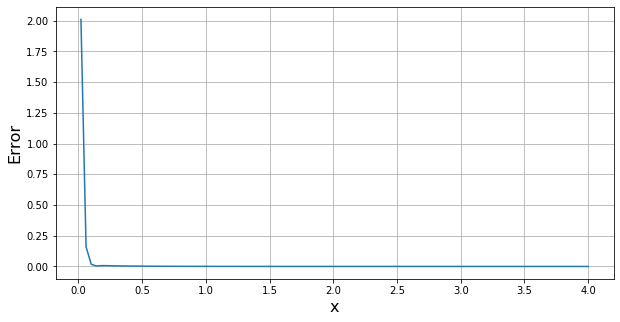

In [66]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
pyplot.plot(x[100:], abs(E_x_theor(Q,1,x[100:]) - E_x[100][100:]));


Как можно видеть, ошибка падает при удалении от заряженной нити. Измените число одиночных зарядов, при помощи которых мы моделируем заряженную нить и число точек расчетной сетки. Посмотрите, как будет меняться ошибка вычислений.